In [ ]:
# PART 1
############################################
# We will start by creating a sine sweep   #
# to review signal processing fundamentals #
############################################

# import all necessary libraries
import librosa
import librosa.display
import numpy as np
from scipy.signal import chirp, butter, lfilter
from scipy.fft import fft
import matplotlib.pyplot as plt

# declare general signal variables:
dur = 3                           # duration in seconds
sr = 44100                        # sampling rate
t = np.linspace(0, dur, dur*sr, endpoint=False)   # time vector

# Q: What's the dimensionality of the time vector? why?
# A: 
# Q: What is the Nyquist limit of this signal?
# A:
# Define the nyquist limit using the relevant variables defined so far
nyq = # your code here

# generate a sine sweep lasting dur and going from 20Hz to 20kHz. Hint: use the scipy chirp function
y = chirp( # your code here

In [ ]:
# we can listen to the resulting signal using these functions
from IPython.display import Audio
Audio(data=y, rate=sr)

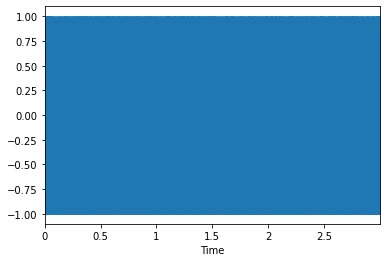

In [ ]:
# use librosa.display.waveplot to plot the signal you just generated
librosa.display.waveplot( # your code here

# Q: What do you see in the resulting plot? Do you find it useful?
# A: 

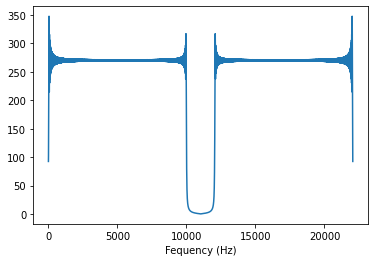

In [ ]:
# compute the FFT of the signal using scipy's fft
Y = fft( # your code here
# the FFT is complex-valued, so get its magnitude using np.abs
Y = np.abs( # your code here

# compute the frequency bins for the fft using np.linspace
f = np.linspace( # your code here

# now plot the fft using plt.plot
plt.plot(f,Y)
plt.xlabel('Fequency (Hz)')
plt.show()

# Q: What do you see in the resulting plot? Does it look like what you expect? Do you find it useful?
# A:

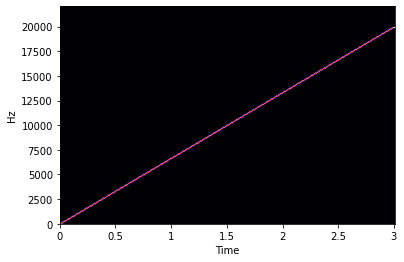

In [ ]:
# librosa.display let's you visualize the short-time Fourier transform 

# first, compute the signals short-time Fourier transform using librosa.stft
S = librosa.stft( # your code here

# the stft is also complex-valued, so get it's magnitude (you could get it in dB using librosa's amplitude_to_db)
S = np.abs( # your code here

# now you can visualize it using librosa.display.specshow. Make sure you pass the parameters x_axis='time',y_axis='linear'
librosa.display.specshow( # your code here

# Q: What do you see in the resulting plot? Do you find it useful?
# Q: Which one is a better picture about the signal's content, the waveform, the fft, or the stft? why?
# A: 

In [ ]:
# PART 2
#######################
# Problem statement   #
#######################


# You are working with a collaborator who is not very familar with 
# digital signals. You give them your chirp signal y(t) with a sampling rate of 
# 44100, but they tell you that the sampling rate is too high. To fix this, they have 
# downsampled your signal using the following method to obtain y_
y_ = y[::2]

# Q: what is the new sampling rate?
sr_ = # your code here

In [ ]:
# listen to the signal
from IPython.display import Audio
Audio(data=y_, rate=sr_)

# Q: Does the signal sound the way you expect it to sound?

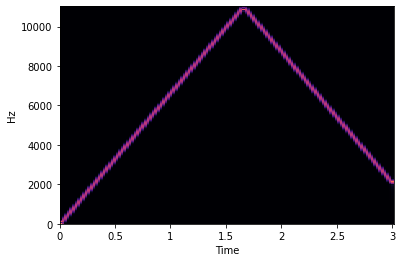

In [ ]:
# plot it's spectrogram

# first, compute the signals short-time Fourier transform using stft
S = librosa.stft( # your code here

# the stft is also complex-valued, so get it's magnitude (you could get it in dB using librosa's amplitude_to_db)
S = np.abs( # your code here
# now you can visualize it using librosa.display.specshow
librosa.display.specshow( # your code here

# Q: what is wrong?
# A: 

# Q: what is the series of signal processing steps that are needed to properly 
# downsample the signal? (i.e. the steps that your collaborator completely ignored)
# A: 

In [ ]:
# This problem can be solved by passing a the signal through a lowpass filter
# with a cut-off frequency close but below nyquist. 

# You show your collaborator how this is properly done by: 
# first filtering the signal, then
# second then using their same resampling method

# define the lowpass filter function
def lowpass(cutoff, sr, order):
    nyq = # your code here to define the nyquist limit    

    # this function returns the coefficients needed to build a
    # butterworth lowpass filter
    # see the function documentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
    # and https://ccrma.stanford.edu/~jos/fp/Butterworth_Lowpass_Design.html
    # if you need to refresh your knowledge of digital fitlers

    b, a = butter(order, cutoff/nyq, btype='low', analog=False) 
    return b, a

# now create a helper function to filter the signal
def lowpass_filter(data, cutoff, sr, order):
    b, a = lowpass(cutoff, sr, order=order)
    y = lfilter(b, a, data)
    return y

y_ = lowpass_filter(y,10000, sr, 20)
y_ = y_[::2]

# Q: What happens if you change the number 20 for another smaller or larger number? 
# A
# Q: What does this number do? What is the "order" of a butterworth lowpass filter and why is it important?
# A

In [ ]:
# now listen to the signal, plot it in the time domain, and plot its spectrogram
from IPython.display import Audio
Audio(data=y_, rate=sr_) 

In [ ]:
# also plot the spectrogram of the signal
# your code here

# Q: What was different this time? Why is this method better?
# A:

# Q: Why does the chirp appear to cease halfway through the new signal?
# A:

In [ ]:
# You can also properly downsample the signal to the target sampling rate using librosa.resample
# using the function's default parameters. This will carry out the resampling method described in
# https://ccrma.stanford.edu/~jos/resample/resample.pdf (check it out if you have time!)

y_ = librosa.resample(y, 44100, 22050)

# Q; which method do your prefer? Why?
# A: 

In [ ]:
# now do the same signal listening, visualization, filtering, and resampling procedures with
# this piece by Brahms. Use librosa.load on librosa.example('brahms').
# Make sure you load the signal with an original sampling rate of 44100Hz

y, sr = librosa.load(librosa.example('brahms')) # hint: see https://librosa.org/doc/main/generated/librosa.load.html

if sr != 44100:
  raise ValueError("Oh NO! The initial sampling rate should be 44100")

Audio(data=y, rate=sr)